----
CC5201-1 Bases de Datos Multimedia.<br>
Genesis Moraga Azócar <br>           
***

# Tarea 2
***

##Parte I:

Para esto, se deben cargar las matrices de distancias de cada algoritmo junto con las clasificaciones de los objetos de consultas y de los objetos del dataset.

**Antes de correr el siguiente código se deben cargar los archivos: algoritmo1.txt, algoritmo2.txt, algoritmo3.txt, query.cla y target.cla.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Carga de datos algoritmo 1

f1 = open("algoritmo1.txt", "r")
v_alg1=f1.readlines()
f1.close()
alg1=np.zeros((len(v_alg1),96487)) #matriz que guardará los datos del algoritmo

for i in range(len(v_alg1)):
  linea=v_alg1[i]
  y=0
  pos=0
  for j in range(len(linea)):
    if linea[j]==" ":
      alg1[i][y]=linea[pos:j]
      y+=1
      pos=j+1
    if j==len(linea)-1:
      alg1[i][y]=linea[pos:]


#Carga de datos algoritmo 2

f2 = open("algoritmo2.txt", "r")
v_alg2=f2.readlines()
f2.close()
alg2=np.zeros((len(v_alg2),96487)) #matriz que guardará los datos del algoritmo

for i in range(len(v_alg2)):
  linea=v_alg2[i]
  y=0
  pos=0
  for j in range(len(linea)):
    if linea[j]==" ":
      alg2[i][y]=linea[pos:j]
      y+=1
      pos=j+1
    if j==len(linea)-1:
      alg2[i][y]=linea[pos:]


#Carga de datos algoritmo 3

f3 = open("algoritmo3.txt", "r")
v_alg3=f3.readlines()
f3.close()
alg3=np.zeros((len(v_alg3),96487)) #matriz que guardará los datos del algoritmo

for i in range(len(v_alg3)):
  linea=v_alg3[i]
  y=0
  pos=0
  for j in range(len(linea)):
    if linea[j]==" ":
      alg3[i][y]=linea[pos:j]
      y+=1
      pos=j+1
    if j==len(linea)-1:
      alg3[i][y]=linea[pos:]

In [ ]:
#Carga de las clases de los objetos query y target
c1 = open("target.cla", "r")
t=c1.readlines()
c1.close()
c2=open("query.cla", "r")
q=c2.readlines()
c2.close()

clase_target= np.zeros(96487)
clase_query= np.zeros(229)

cont=3
objeto=0

for i in range(9):
  line_obj=t[cont]
  if i==8:
    n_obj=int(line_obj[-6:])
  else: 
    n_obj=int(line_obj[-3:])
  for j in range(cont+1,cont+n_obj+1):
    clase_target[objeto]=i
    objeto+=1
  cont+=n_obj+2

cont=3
objeto=0

for i in range(9):
  line_obj=q[cont]
  n_obj=int(line_obj[-3:])
  for j in range(cont+1,cont+n_obj+1):
    clase_query[objeto]=i
    objeto+=1
  cont+=n_obj+2


Luego, por cada objeto de consulta(query) hay que ordenar los objetos del dataset(target) según los más cercanos. Además, por cada query hay que especificar cuales target son relevantes(son de la misma clase).

In [ ]:
#matrices para cada algoritmo que tienen el indice de los target ordenados
ord_alg1=np.argsort(alg1, axis=1)
ord_alg2=np.argsort(alg2, axis=1)
ord_alg3=np.argsort(alg3, axis=1)

#matrices donde se guardaran con un 1 los relevantes
relevantes_alg1=np.zeros((229,96487))
relevantes_alg2=np.zeros((229,96487))
relevantes_alg3=np.zeros((229,96487))

for i in range(229):
  for j in range(96487):
    if clase_query[i]==clase_target[ord_alg1[i][j]]:
      relevantes_alg1[i][j]=1
    if clase_query[i]==clase_target[ord_alg2[i][j]]:
      relevantes_alg2[i][j]=1
    if clase_query[i]==clase_target[ord_alg3[i][j]]:
      relevantes_alg3[i][j]=1  

#se guarda el numero total de relevantes para cada consulta por cada algoritmo
num_relevantes1=np.zeros(229)
num_relevantes2=np.zeros(229)
num_relevantes3=np.zeros(229)

for i in range(229):
  num=0
  for j in range(96487):
    if relevantes_alg1[i][j]==1:
      num+=1
  num_relevantes1[i]=num

for i in range(229):
  num=0
  for j in range(96487):
    if relevantes_alg2[i][j]==1:
      num+=1
  num_relevantes2[i]=num

for i in range(229):
  num=0
  for j in range(96487):
    if relevantes_alg3[i][j]==1:
      num+=1
  num_relevantes3[i]=num


Ahora, se calculan los datos de recall y precision:

In [ ]:
#Calculo para algoritmo1
matriz_precision1=np.zeros((229,11))
matriz_recall1=np.zeros((229,11))


ft1=np.ones(229)
st1=np.ones(229)
ap1=np.zeros(229)

for i in range(229):
  precision = []
  recall = []

  cont = 0
  for j in range(96487):
    if relevantes_alg1[i][j]==1:
      cont=cont+1
    precision.append(cont/(j+1))
    recall.append(cont/num_relevantes1[i])

    if j==relevantes_alg1[i][j]:
      ft1[i]=cont/num_relevantes1[i]
    if j==2*relevantes_alg1[i][j]:
      st1[i]=cont/num_relevantes1[i]

    if cont/num_relevantes1[i]==1:
      break
  
  ap1[i]=np.mean(np.array(precision))

  recall = [val*100 for val in recall]
  numBins = 10
  currentRecall = 100 - 100/numBins
  maxPrec = precision[-1]
  precision_recall = np.zeros((numBins+1))
  recall2 = np.zeros((numBins+1))
  pos = numBins
  precision_recall[pos] = maxPrec
  recall2[pos] = 100
  cont = len(precision)-2
  pos = pos - 1

  while cont >=0:
    if recall[cont]>= currentRecall:
      if precision[cont] > maxPrec:
        maxPrec = precision[cont]
      cont = cont - 1
    else:
      precision_recall[pos] = maxPrec
      recall2[pos] = currentRecall
      currentRecall=currentRecall - numBins
      pos = pos - 1

  while pos>=0:
    precision_recall[pos] = maxPrec
    pos = pos-1

  recall2 = recall2/100

  matriz_precision1[i]=precision_recall
  matriz_recall1[i]=recall2

prom_recall1=np.mean(matriz_recall1,axis=0)
prom_precision1=np.mean(matriz_precision1,axis=0)


In [ ]:
#Calculo para algoritmo2
matriz_precision2=np.zeros((229,11))
matriz_recall2=np.zeros((229,11))


ft2=np.ones(229)
st2=np.ones(229)
ap2=np.zeros(229)

for i in range(229):
  precision = []
  recall = []

  cont = 0
  for j in range(96487):
    if relevantes_alg2[i][j]==1:
      cont=cont+1
    precision.append(cont/(j+1))
    recall.append(cont/num_relevantes2[i])

    if j==relevantes_alg2[i][j]:
      ft2[i]=cont/num_relevantes2[i]
    if j==2*relevantes_alg2[i][j]:
      st2[i]=cont/num_relevantes2[i]

    if cont/num_relevantes2[i]==1:
      break
  
  ap2[i]=np.mean(np.array(precision))

  recall = [val*100 for val in recall]
  numBins = 10
  currentRecall = 100 - 100/numBins
  maxPrec = precision[-1]
  precision_recall = np.zeros((numBins+1))
  recall2 = np.zeros((numBins+1))
  pos = numBins
  precision_recall[pos] = maxPrec
  recall2[pos] = 100
  cont = len(precision)-2
  pos = pos - 1

  while cont >=0:
    if recall[cont]>= currentRecall:
      if precision[cont] > maxPrec:
        maxPrec = precision[cont]
      cont = cont - 1
    else:
      precision_recall[pos] = maxPrec
      recall2[pos] = currentRecall
      currentRecall=currentRecall - numBins
      pos = pos - 1

  while pos>=0:
    precision_recall[pos] = maxPrec
    pos = pos-1

  recall2 = recall2/100

  matriz_precision2[i]=precision_recall
  matriz_recall2[i]=recall2

prom_recall2=np.mean(matriz_recall2,axis=0)
prom_precision2=np.mean(matriz_precision2,axis=0)


In [ ]:
#Calculo para algoritmo3
matriz_precision3=np.zeros((229,11))
matriz_recall3=np.zeros((229,11))

ft3=np.ones(229)
st3=np.ones(229)
ap3=np.zeros(229)

for i in range(229):
  precision = []
  recall = []

  cont = 0
  for j in range(96487):
    if relevantes_alg3[i][j]==1:
      cont=cont+1
    precision.append(cont/(j+1))
    recall.append(cont/num_relevantes3[i])

    if j==relevantes_alg3[i][j]:
      ft3[i]=cont/num_relevantes3[i]
    if j==2*relevantes_alg3[i][j]:
      st3[i]=cont/num_relevantes3[i]

    if cont/num_relevantes3[i]==1:
      break
  
  ap3[i]=np.mean(np.array(precision))

  recall = [val*100 for val in recall]
  numBins = 10
  currentRecall = 100 - 100/numBins
  maxPrec = precision[-1]
  precision_recall = np.zeros((numBins+1))
  recall2 = np.zeros((numBins+1))
  pos = numBins
  precision_recall[pos] = maxPrec
  recall2[pos] = 100
  cont = len(precision)-2
  pos = pos - 1

  while cont >=0:
    if recall[cont]>= currentRecall:
      if precision[cont] > maxPrec:
        maxPrec = precision[cont]
      cont = cont - 1
    else:
      precision_recall[pos] = maxPrec
      recall2[pos] = currentRecall
      currentRecall=currentRecall - numBins
      pos = pos - 1

  while pos>=0:
    precision_recall[pos] = maxPrec
    pos = pos-1

  recall2 = recall2/100

  matriz_precision3[i]=precision_recall
  matriz_recall3[i]=recall2

prom_recall3=np.mean(matriz_recall3,axis=0)
prom_precision3=np.mean(matriz_precision3,axis=0)


####Gráfica recall-precision

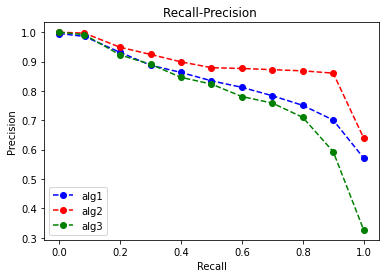

In [ ]:
plt.figure()
plt.plot(prom_recall1, prom_precision1,'bo--')


plt.plot(prom_recall2, prom_precision2,'ro--')

plt.plot(prom_recall3, prom_precision3,'go--')

plt.title("Recall-Precision ")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(("alg1","alg2","alg3"))
plt.show()

####First tier
Valor de la precision cuando los objetos recuperados es igual el número de relevantes.

In [ ]:
print("First tier algoritmo 1:",np.mean(ft1))
print("First tier algoritmo 2:",np.mean(ft2))
print("First tier algoritmo 3:",np.mean(ft3))

First tier algoritmo 1: 0.14883719887050503
First tier algoritmo 2: 0.12649199417758367
First tier algoritmo 3: 0.13071077887153676


####Second tier
Valor de la precision cuando el número de relevantes es dos veces el número de recuperados

In [ ]:
print("Second tier algoritmo 1:",np.mean(st1))
print("Second tier algoritmo 2:",np.mean(st2))
print("Second tier algoritmo 3:",np.mean(st3))

Second tier algoritmo 1: 0.20382348389527724
Second tier algoritmo 2: 0.16804949053857351
Second tier algoritmo 3: 0.1802716305232773


####Mean average precision
Promedio del promedio de las precisiones

In [ ]:
print("MAP algoritmo 1:", np.mean(ap1))
print("MAP algoritmo 2:", np.mean(ap2))
print("MAP algoritmo 3:", np.mean(ap3))

MAP algoritmo 1: 0.7145570228739176
MAP algoritmo 2: 0.7257429918039111
MAP algoritmo 3: 0.4992356914975013


In [ ]:
print("MAP algoritmo 1:", np.mean(prom_precision1))
print("MAP algoritmo 2:", np.mean(prom_precision2))
print("MAP algoritmo 3:", np.mean(prom_precision3))

MAP algoritmo 1: 0.8288103601211713
MAP algoritmo 2: 0.8878501128021675
MAP algoritmo 3: 0.7858305263278307


####Métrica Nearest Neighbor (NN)
Proporción de objetos de consulta cuyo vecino más cercano en el target es un objeto relevante a esa consulta.

###Análisis de resultados:
En los gráfico recall-precision se puede observar que el algoritmo 2 tiene la precisión más alta en todos los valores de recall, por lo que se podría decir que es el mejor en términos generales.
Además, cabe destacar, que a pequeños valores de reccal(cuando se necesitan pocos ojetos relevantes) la precisión de los tres algoritmos es similar y alta. En cambio, a mayor reccal las curvas de los algoritmos se van alejando, marcando la diferencia entre el mejor, algoritmo 2, y el peor, algoritmo 3.

Estos resultados concuerdan con lo obtenido al calcular el Mean Average Precision, que le da la mayor precisión promedio de 0.72 al algoritmo 2 y la más baja la obtiene el algoritmo 3 con un valor 0.49.

En cambio, en el resultado del first tier y second tier, el mejor algoritmo es el número uno. Se puede decir que si se necesita obtener la misma cantidad de recuperados que de relevantes, hay que elegir este algoritmo.



***

##Parte II:
####Analizar la efectividad clase por clase.

Para cada clase se debe calcular lo mismo que en la parte anterior, pero usando solo objetos de consulta de la misma clase.

In [ ]:
#Calculo para algoritmo1

init=[0,59,69,129,139,150,160,219,229]

prom_recall1=np.zeros((8,11))
prom_precision1=np.zeros((8,11))

prom_ft1=np.ones(8)
prom_st1=np.ones(8)
prom_ap1=np.zeros(8)


for k in range(8):
  num_obj=init[k+1]-init[k]

  matriz_precision1=np.zeros((num_obj,11))
  matriz_recall1=np.zeros((num_obj,11))

  ft1=np.ones(num_obj)
  st1=np.ones(num_obj)
  ap1=np.zeros(num_obj)

  cont_obj=0
  for i in range(init[k],init[k+1]):
    precision = []
    recall = []
    
    cont = 0
    for j in range(96487):
      if relevantes_alg1[i][j]==1:
        cont=cont+1
      precision.append(cont/(j+1))
      recall.append(cont/num_relevantes1[i])

      if j==relevantes_alg1[i][j]:
        ft1[cont_obj]=cont/num_relevantes1[i]
      if j==2*relevantes_alg1[i][j]:
        st1[cont_obj]=cont/num_relevantes1[i]

      if cont/num_relevantes1[i]==1:
        break
    
    ap1[cont_obj]=np.mean(np.array(precision))

    recall = [val*100 for val in recall]
    numBins = 10
    currentRecall = 100 - 100/numBins
    maxPrec = precision[-1]
    precision_recall = np.zeros((numBins+1))
    recall2 = np.zeros((numBins+1))
    pos = numBins
    precision_recall[pos] = maxPrec
    recall2[pos] = 100
    cont = len(precision)-2
    pos = pos - 1

    while cont >=0:
      if recall[cont]>= currentRecall:
        if precision[cont] > maxPrec:
          maxPrec = precision[cont]
        cont = cont - 1
      else:
        precision_recall[pos] = maxPrec
        recall2[pos] = currentRecall
        currentRecall=currentRecall - numBins
        pos = pos - 1

    while pos>=0:
      precision_recall[pos] = maxPrec
      pos = pos-1

    recall2 = recall2/100

    matriz_precision1[cont_obj]=precision_recall
    matriz_recall1[cont_obj]=recall2
    cont_obj+=1

  prom_recall1[k]=np.mean(matriz_recall1,axis=0)
  prom_precision1[k]=np.mean(matriz_precision1,axis=0)
  prom_ft1[k]=np.mean(ft1)
  prom_st1[k]=np.mean(st1)
  prom_ap1[k]=np.mean(ap1)

In [ ]:
#Calculo para algoritmo2

init=[0,59,69,129,139,150,160,219,229]

prom_recall2=np.zeros((8,11))
prom_precision2=np.zeros((8,11))

prom_ft2=np.ones(8)
prom_st2=np.ones(8)
prom_ap2=np.zeros(8)


for k in range(8):
  num_obj=init[k+1]-init[k]

  matriz_precision2=np.zeros((num_obj,11))
  matriz_recall2=np.zeros((num_obj,11))

  ft2=np.ones(num_obj)
  st2=np.ones(num_obj)
  ap2=np.zeros(num_obj)

  cont_obj=0
  for i in range(init[k],init[k+1]):
    precision = []
    recall = []
    
    cont = 0
    for j in range(96487):
      if relevantes_alg2[i][j]==1:
        cont=cont+1
      precision.append(cont/(j+1))
      recall.append(cont/num_relevantes2[i])

      if j==relevantes_alg2[i][j]:
        ft2[cont_obj]=cont/num_relevantes2[i]
      if j==2*relevantes_alg2[i][j]:
        st2[cont_obj]=cont/num_relevantes2[i]

      if cont/num_relevantes2[i]==1:
        break
    
    ap2[cont_obj]=np.mean(np.array(precision))

    recall = [val*100 for val in recall]
    numBins = 10
    currentRecall = 100 - 100/numBins
    maxPrec = precision[-1]
    precision_recall = np.zeros((numBins+1))
    recall2 = np.zeros((numBins+1))
    pos = numBins
    precision_recall[pos] = maxPrec
    recall2[pos] = 100
    cont = len(precision)-2
    pos = pos - 1

    while cont >=0:
      if recall[cont]>= currentRecall:
        if precision[cont] > maxPrec:
          maxPrec = precision[cont]
        cont = cont - 1
      else:
        precision_recall[pos] = maxPrec
        recall2[pos] = currentRecall
        currentRecall=currentRecall - numBins
        pos = pos - 1

    while pos>=0:
      precision_recall[pos] = maxPrec
      pos = pos-1

    recall2 = recall2/100

    matriz_precision2[cont_obj]=precision_recall
    matriz_recall2[cont_obj]=recall2
    cont_obj+=1

  prom_recall2[k]=np.mean(matriz_recall2,axis=0)
  prom_precision2[k]=np.mean(matriz_precision2,axis=0)
  prom_ft2[k]=np.mean(ft2)
  prom_st2[k]=np.mean(st2)
  prom_ap2[k]=np.mean(ap2)

In [ ]:
#Calculo para algoritmo3

init=[0,59,69,129,139,150,160,219,229]

prom_recall3=np.zeros((8,11))
prom_precision3=np.zeros((8,11))

prom_ft3=np.ones(8)
prom_st3=np.ones(8)
prom_ap3=np.zeros(8)


for k in range(8):
  num_obj=init[k+1]-init[k]

  matriz_precision3=np.zeros((num_obj,11))
  matriz_recall3=np.zeros((num_obj,11))

  ft3=np.ones(num_obj)
  st3=np.ones(num_obj)
  ap3=np.zeros(num_obj)

  cont_obj=0
  for i in range(init[k],init[k+1]):
    precision = []
    recall = []
    
    cont = 0
    for j in range(96487):
      if relevantes_alg3[i][j]==1:
        cont=cont+1
      precision.append(cont/(j+1))
      recall.append(cont/num_relevantes3[i])

      if j==relevantes_alg3[i][j]:
        ft3[cont_obj]=cont/num_relevantes3[i]
      if j==2*relevantes_alg3[i][j]:
        st3[cont_obj]=cont/num_relevantes3[i]

      if cont/num_relevantes3[i]==1:
        break
    
    ap3[cont_obj]=np.mean(np.array(precision))

    recall = [val*100 for val in recall]
    numBins = 10
    currentRecall = 100 - 100/numBins
    maxPrec = precision[-1]
    precision_recall = np.zeros((numBins+1))
    recall2 = np.zeros((numBins+1))
    pos = numBins
    precision_recall[pos] = maxPrec
    recall2[pos] = 100
    cont = len(precision)-2
    pos = pos - 1

    while cont >=0:
      if recall[cont]>= currentRecall:
        if precision[cont] > maxPrec:
          maxPrec = precision[cont]
        cont = cont - 1
      else:
        precision_recall[pos] = maxPrec
        recall2[pos] = currentRecall
        currentRecall=currentRecall - numBins
        pos = pos - 1

    while pos>=0:
      precision_recall[pos] = maxPrec
      pos = pos-1

    recall2 = recall2/100

    matriz_precision3[cont_obj]=precision_recall
    matriz_recall3[cont_obj]=recall2
    cont_obj+=1

  prom_recall3[k]=np.mean(matriz_recall3,axis=0)
  prom_precision3[k]=np.mean(matriz_precision3,axis=0)
  prom_ft3[k]=np.mean(ft3)
  prom_st3[k]=np.mean(st3)
  prom_ap3[k]=np.mean(ap3)

###Gráficos reccal-precision
Se crearán 8 gráficos, uno por cada clase(sin contar la clase otro que no tiene consultas), para comparar los algoritmos y ver como actuan según cada clase.

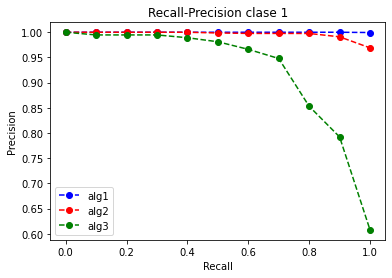

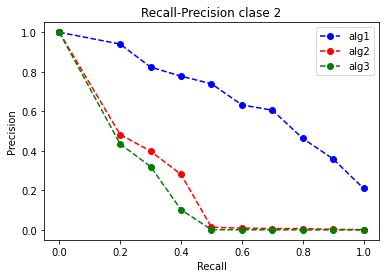

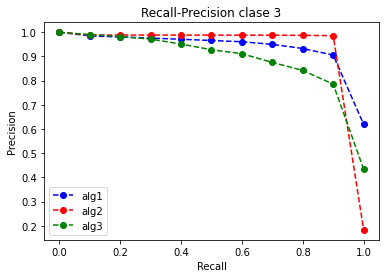

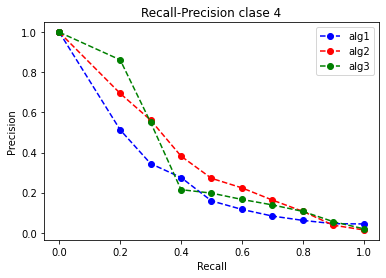

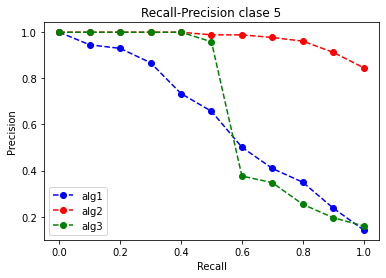

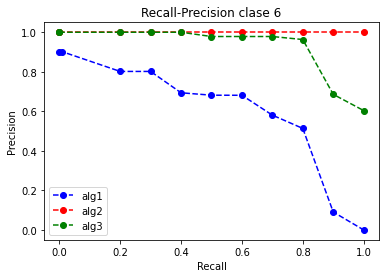

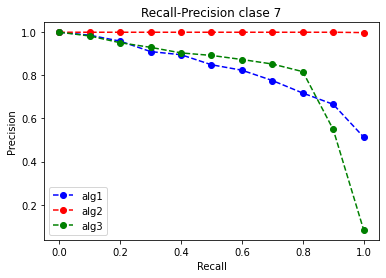

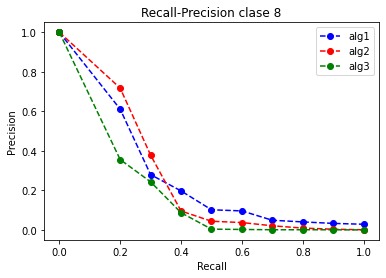

In [ ]:
for i in range(8):
  plt.figure()
  plt.plot(prom_recall1[i], prom_precision1[i],'bo--')

  plt.plot(prom_recall2[i], prom_precision2[i],'ro--')

  plt.plot(prom_recall3[i], prom_precision3[i],'go--')

  plt.title("Recall-Precision clase "+str(i+1))
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.legend(("alg1","alg2","alg3"))
  plt.show()

###First tier
Se imprimirán 8 lineas, una por cada clase, para comparar los 3 algoritmos.

In [ ]:
for i in range(8):
  print(prom_ft1[i],prom_ft2[i],prom_ft3[i])

0.033898305084745756 0.033898305084745756 0.05027291008330938
0.2800000000000001 0.6799999999999999 0.6799999999999999
0.06555555555555555 0.04944444444444444 0.04944444444444444
0.9199999999999999 0.6 0.36000000000000004
0.25619834710743794 0.18181818181818182 0.18181818181818182
0.26 0.2 0.2
0.06664751508187301 0.033898305084745756 0.033898305084745756
0.6799999999999999 0.52 0.76


###Second tier
Se imprimirán 8 lineas, una por cada clase, para comparar los 3 algoritmos.

In [ ]:
for i in range(8):
  print(prom_st1[i],prom_st2[i],prom_st3[i])

0.05084745762711863 0.05084745762711863 0.06664751508187301
0.43999999999999995 0.7899999999999999 0.7899999999999999
0.16083333333333333 0.04972222222222221 0.06583333333333333
0.8399999999999999 0.85 0.79
0.3388429752066115 0.27272727272727265 0.27272727272727265
0.33999999999999997 0.29999999999999993 0.29999999999999993
0.08302212008043665 0.05084745762711863 0.05084745762711863
0.9199999999999999 0.71 0.86


###Mean Average Precision
Se imprimirán 8 lineas, una por cada clase, para comparar los 3 algoritmos.

In [ ]:
for i in range(8):
  print(prom_ap1[i],prom_ap2[i],prom_ap3[i])

0.9999761375656134 0.9928990258417979 0.7746548405563503
0.4004534790530713 0.005182359362757763 0.0006970167232057232
0.8666839416192818 0.4625411084134602 0.7245346393887895
0.08541896278480217 0.04575088956672282 0.053235222856919465
0.30871513464935485 0.9382832248450644 0.3123170092630118
0.0008531260365970839 1.0 0.7792480893013175
0.7420235597267225 0.9998880308436897 0.2267001875832538
0.059141744083480476 0.003779431125375441 0.0005657938656227808


###Análisis de resultados

Al comparar los gráficos de reccall-precision separados por clase se pueden ver notables diferencias. Por ejemplo, en la clase dos el algortimo uno siempre tiene la mejor precisión y en la clase seis este algoritmo es el peor al comparar con los otros dos. Entonces, se tiene que tener en consideración que los algoritmos pueden funcionar mejor o peor dependiendo de que objeto estoy comparando, sin olvidar en el rango de recall en que quiero trabajar(lo que sería muy importante en la clase 4 u 8).

En los resultados de first y second tier, se observa que los algoritmos mejores se repiten varias veces según la clase. Por ejemplo, el mejor algoritmo de la clase 3 es el primero tanto en el first como en el second tier, lo mismo ocurre en la clase 1, 2, 5.
También, resulta muy importante en que clase uso los algoritmos, pues en algunas obtengo una precision muy buena y en otras bastante mala. Además, cabe destacar que el algoritmo 1 obtiene buenos resultados en varias clases según estas medidas.

Al ver los resultados del MAP tambien encontramos grandes diferencias según la clase. En la clase 1, 2, 3, 4 y 8 el mejor algoritmo es el primero, en cambio, en la clase 5, 6 y 7 obtiene mejor resultado el algoritmo 2.


***